### Experiment directory search

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
%matplotlib inline

# REplace this with the required experiement directory name. 
experiment_directory_path = './test5sweep_2025-05-23_12.39.37'
csv_file_pattern = os.path.join(experiment_directory_path, 'results_r_*_a_*.csv')
csv_files = glob.glob(csv_file_pattern)
if not csv_files:
    print(f"No CSV files found in '{experiment_directory_path}'. Please check the path and that files exist.")
else:
    print(f"Found {len(csv_files)} CSV files:")
    for f_path in csv_files:
        print(os.path.basename(f_path))

Found 9 CSV files:
results_r_0.0020_a_0.4.csv
results_r_0.0020_a_0.5.csv
results_r_0.0020_a_0.6.csv
results_r_0.0025_a_0.4.csv
results_r_0.0025_a_0.5.csv
results_r_0.0025_a_0.6.csv
results_r_0.0030_a_0.4.csv
results_r_0.0030_a_0.5.csv
results_r_0.0030_a_0.6.csv


### Main


File: results_r_0.0020_a_0.4.csv


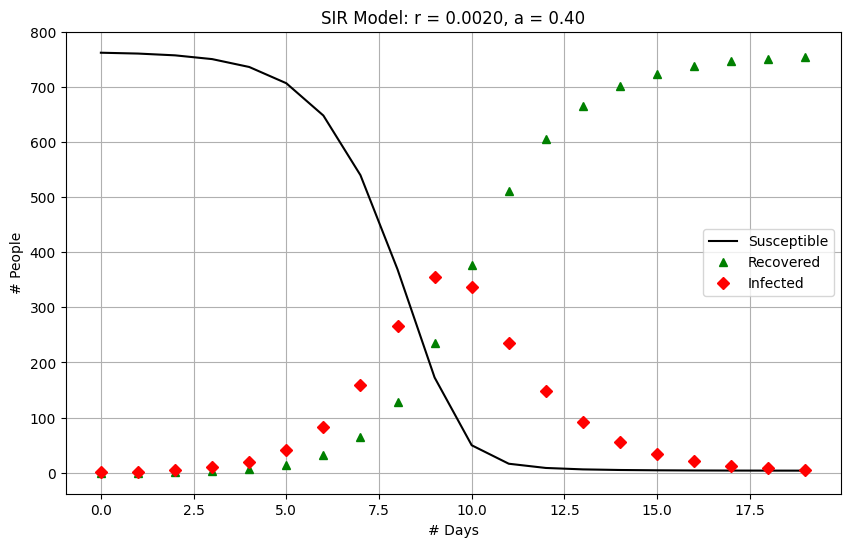


File: results_r_0.0020_a_0.5.csv


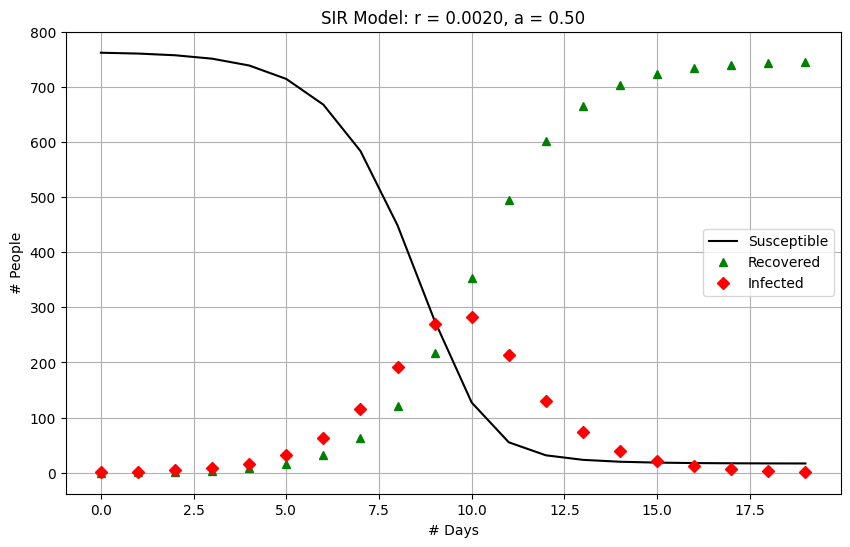


File: results_r_0.0020_a_0.6.csv


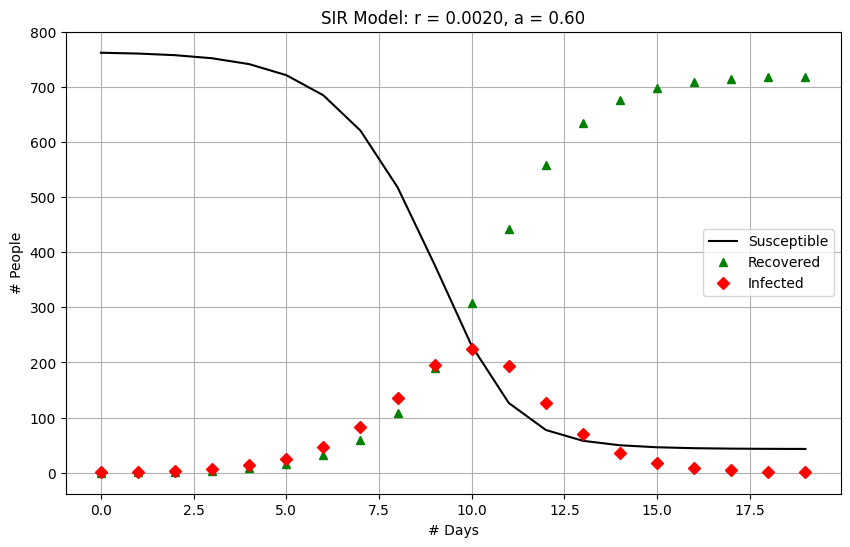


File: results_r_0.0025_a_0.4.csv


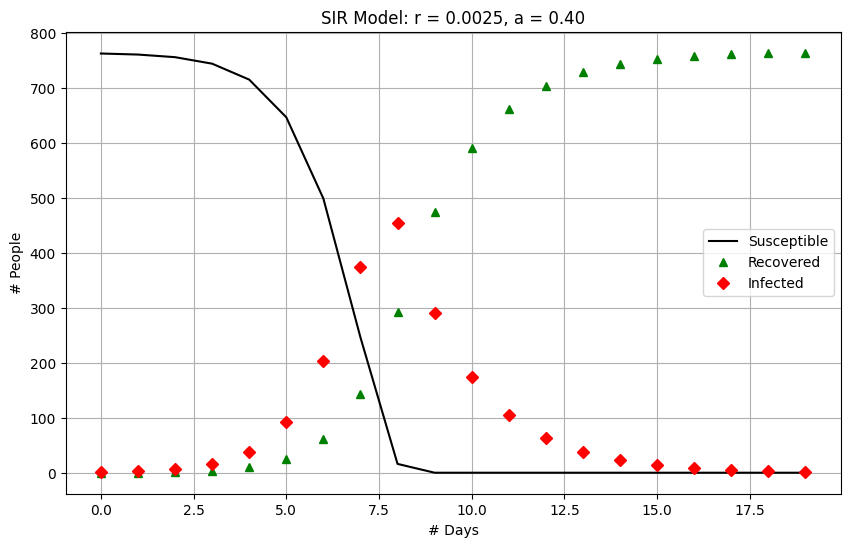


File: results_r_0.0025_a_0.5.csv


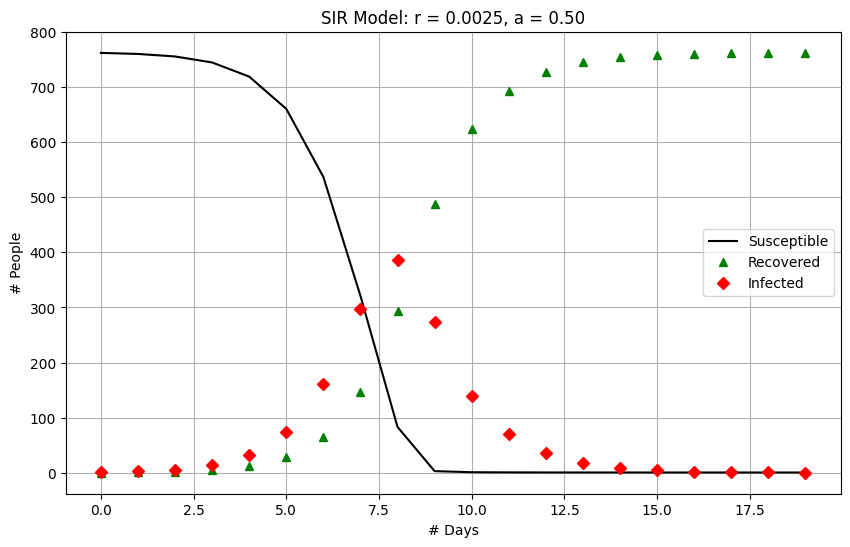


File: results_r_0.0025_a_0.6.csv


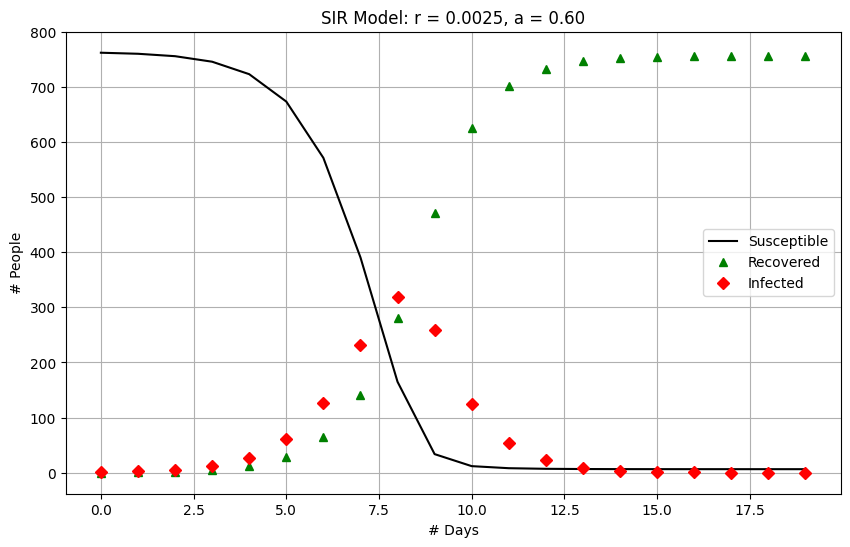


File: results_r_0.0030_a_0.4.csv


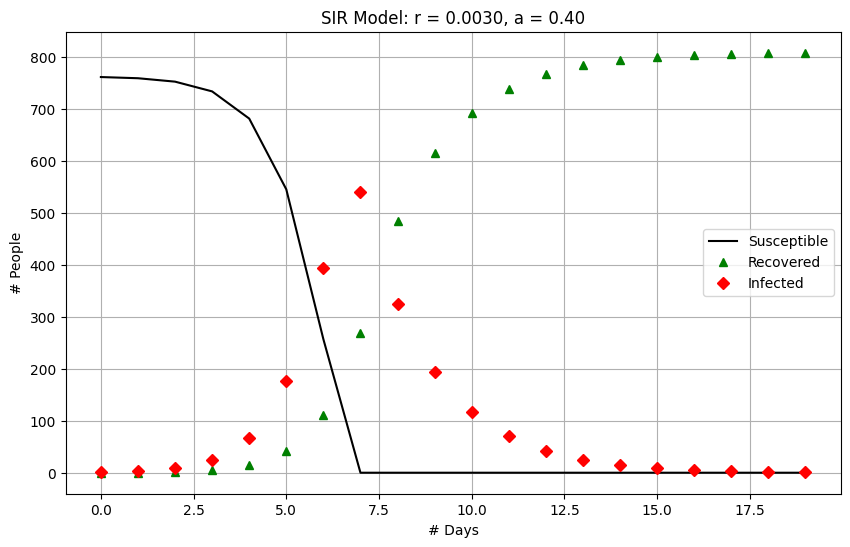


File: results_r_0.0030_a_0.5.csv


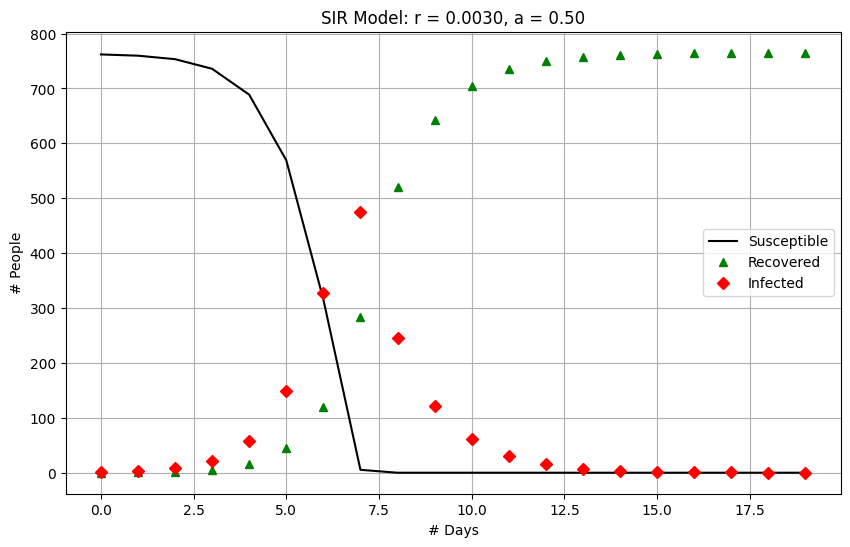


File: results_r_0.0030_a_0.6.csv


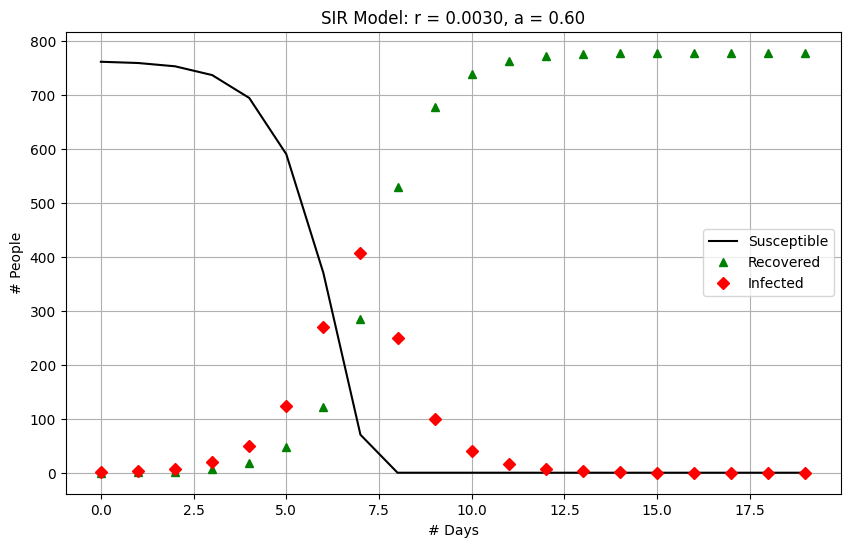

In [5]:
if not csv_files:
    print("No CSV files to process")
else:
    for csv_file_path in csv_files:
        print(f"\nFile: {os.path.basename(csv_file_path)}")
        filename = os.path.basename(csv_file_path)
        try:
            parts = filename.replace('results_r_', '').replace('.csv', '').split('_a_') # results_r_RVAL_a_AVAL.csv
            r_value_str = parts[0]
            a_value_str = parts[1]
            r_value = float(r_value_str)
            a_value = float(a_value_str)
        except Exception as e:
            print(f"  Could not parse r and a from filename: {filename}. Error: {e}")
            continue # else: skip this file
        try:
            df = pd.read_csv(csv_file_path, skiprows=1, skipfooter=1, engine='python')
            # Check if DataFrame is empty or has expected columns
            if df.empty or not all(col in df.columns for col in ['Day', 'Susceptible', 'Recovered', 'Infected']):
                print(f"Warning: DataFrame for {filename} is non-existant.")
                header_row_num = None
                with open(csv_file_path, 'r') as f_in:
                    for i, line in enumerate(f_in):
                        if line.strip().startswith("Day,Susceptible,Recovered,Infected"):
                            header_row_num = i
                            break
                if header_row_num is not None:
                    df = pd.read_csv(csv_file_path, header=header_row_num, skipfooter=1, engine='python')
                    df = df[df['Day'].apply(lambda x: isinstance(x, (int, float)))] 
                else:
                    print(f"  Could not locate the CSV header in {filename}.")
                    continue
            for col in ['Day', 'Susceptible', 'Recovered', 'Infected']:
                if col in df.columns:
                    df[col] = pd.to_numeric(df[col], errors='coerce')
            df.dropna(inplace=True) 
            if df.empty:
                print(f"  DataFrame for {filename} is empty after processing and cleaning.")
                continue
        except Exception as e:
            print(f"  Error loading or processing CSV file {filename}: {e}")
            continue
        # Plot fig
        plt.figure(figsize=(10, 6))
        plt.plot(df['Day'], df['Susceptible'], 'k-', label='Susceptible')
        plt.plot(df['Day'], df['Recovered'], 'g^', label='Recovered') 
        plt.plot(df['Day'], df['Infected'], 'rD', label='Infected') 
        plt.xlabel("# Days")
        plt.ylabel("# People")
        plt.title(f"SIR Model: r = {r_value:.4f}, a = {a_value:.2f}")
        plt.legend()
        plt.grid(True)
        plt.show() # Display in jupyter